In [1]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.abspath('C:\\Users\\Muhammad.Atta\\Desktop\\Lab2_data\\Lab2_data')

df = pd.read_csv(path + "\\MedicalData.csv")

df.columns = ['S.NO','Age','Gender','Disease','Year']

print(df.isnull().sum())

print(df.describe())
print(df.info())
print(df.shape)

S.NO       0
Age        0
Gender     0
Disease    0
Year       0
dtype: int64
              S.NO          Age         Year
count  6907.000000  6907.000000  6907.000000
mean   3454.000000    48.517736  2016.351527
std    1994.023487    16.101782     1.331766
min       1.000000    21.000000  2014.000000
25%    1727.500000    35.000000  2015.000000
50%    3454.000000    49.000000  2017.000000
75%    5180.500000    62.000000  2018.000000
max    6907.000000    76.000000  2018.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6907 entries, 0 to 6906
Data columns (total 5 columns):
S.NO       6907 non-null int64
Age        6907 non-null int64
Gender     6907 non-null object
Disease    6907 non-null object
Year       6907 non-null int64
dtypes: int64(3), object(2)
memory usage: 269.9+ KB
None
(6907, 5)


   ## ------ Age Vs Disease-------- 

In [3]:
df['age_bins'] = pd.cut(x=df['Age'], bins=[20, 30, 40, 50,60,70,80])

In [4]:
age_disease = pd.DataFrame(df.groupby('age_bins')['Disease'].value_counts().unstack())

In [5]:
age_disease.fillna(0, inplace=True)
age_disease['others'] =  age_disease[['Acute febrile mucocutaneous lymph node syndrome [MCLS]' , 'Crimean hemorrhagic fever (CHF Congo virus)' , 'Maternal pyrexia' ,'Postprocedural fever','Rheumatic fever','Sinusitis' ,'Mosquito-borne fever/Chikungunya' , 'Fever of unknown origin (PUO)','Tetanus']].sum(axis=1)
age_disease.drop(labels = ['Acute febrile mucocutaneous lymph node syndrome [MCLS]' , 'Crimean hemorrhagic fever (CHF Congo virus)' , 'Maternal pyrexia' ,'Postprocedural fever','Rheumatic fever','Sinusitis' ,'Mosquito-borne fever/Chikungunya','Fever of unknown origin (PUO)','Tetanus'],axis="columns", inplace=True)
age_disease

Disease,Dengue,Encephalitis,Febrile convulsions,Fever of unknown 0rigin,Malaria,Meningitis,Mosquito-borne hemorrhagic fever,Pneumonia,Typhoid fever,Viral Fever,Viral hepatitis,others
age_bins,,,,,,,,,,,,
"(20, 30]",119.0,23.0,62.0,30.0,81.0,39.0,3.0,546.0,145.0,145.0,8.0,29.0
"(30, 40]",107.0,22.0,58.0,40.0,82.0,35.0,5.0,548.0,128.0,137.0,24.0,17.0
"(40, 50]",113.0,30.0,49.0,42.0,77.0,37.0,4.0,600.0,137.0,155.0,23.0,29.0
"(50, 60]",118.0,33.0,51.0,33.0,79.0,41.0,12.0,531.0,115.0,147.0,24.0,28.0
"(60, 70]",113.0,30.0,74.0,32.0,79.0,45.0,4.0,518.0,153.0,154.0,21.0,25.0
"(70, 80]",71.0,24.0,30.0,9.0,45.0,19.0,3.0,329.0,75.0,93.0,11.0,9.0


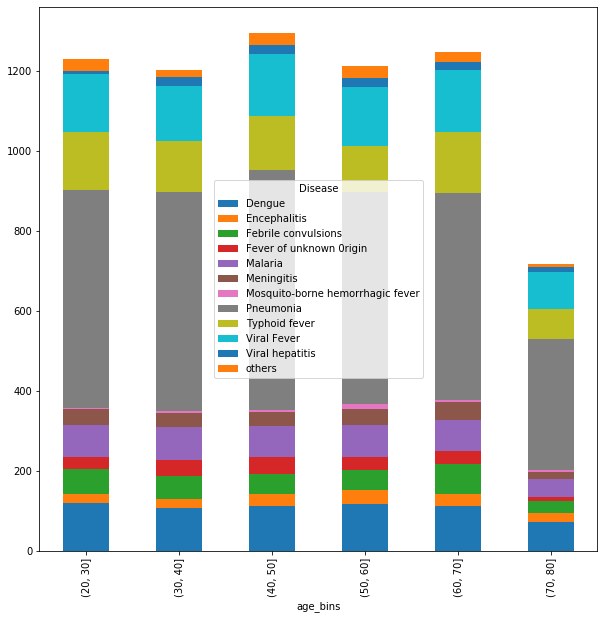

In [6]:
age_disease[list(age_disease.columns)].plot(kind='bar',stacked=True, figsize=(10,10) )


In [7]:
disease_age = pd.DataFrame(df.groupby('Disease')['age_bins'].value_counts().unstack())

In [8]:
disease_age.fillna(0, inplace=True)

disease_age

age_bins,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Disease,,,,,,
Acute febrile mucocutaneous lymph node syndrome [MCLS],0.0,0.0,1.0,1.0,2.0,0.0
Crimean hemorrhagic fever (CHF Congo virus),3.0,0.0,0.0,0.0,0.0,0.0
Dengue,119.0,107.0,113.0,118.0,113.0,71.0
Encephalitis,23.0,22.0,30.0,33.0,30.0,24.0
Febrile convulsions,62.0,58.0,49.0,51.0,74.0,30.0
Fever of unknown 0rigin,30.0,40.0,42.0,33.0,32.0,9.0
Fever of unknown origin (PUO),7.0,4.0,9.0,4.0,6.0,2.0
Malaria,81.0,82.0,77.0,79.0,79.0,45.0
Maternal pyrexia,1.0,1.0,2.0,5.0,2.0,1.0


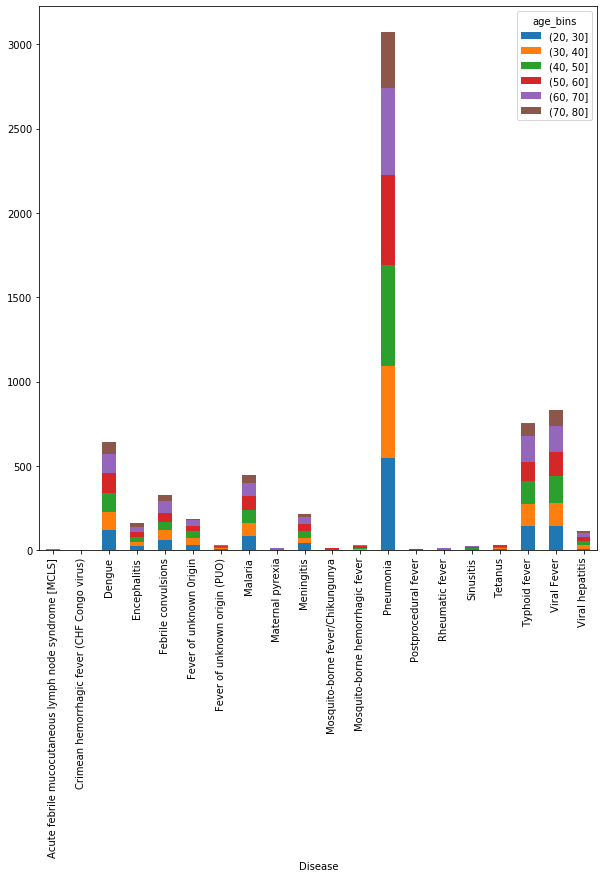

In [9]:
disease_age[list(disease_age.columns)].plot(kind='bar', stacked = True , figsize=(10,10))


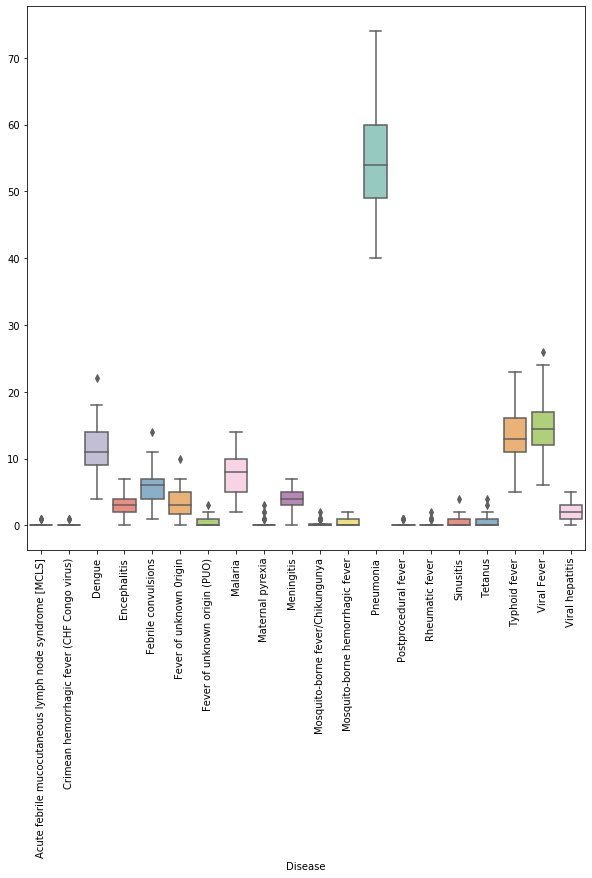

In [14]:
age_per_disease = pd.DataFrame(df.groupby('Age')['Disease'].value_counts().unstack())
age_per_disease.fillna(0, inplace=True)
fig = plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
ax = sns.boxplot( data=age_per_disease , palette="Set3")

In [21]:
pd_crosstab1 = pd.crosstab(df["Disease"], df["Age"])
print(pd_crosstab1)


Age                                                 21  22  23  24  25  26  \
Disease                                                                      
Acute febrile mucocutaneous lymph node syndrome...   0   0   0   0   0   0   
Crimean hemorrhagic fever (CHF Congo virus)          0   0   0   1   0   0   
Dengue                                              12  15   8  16   6  15   
Encephalitis                                         2   2   3   4   1   3   
Febrile convulsions                                  5   8   6  14   6   4   
Fever of unknown 0rigin                              2   5   6   4   5   3   
Fever of unknown origin (PUO)                        0   0   0   0   1   1   
Malaria                                              6  11   8  10  10   5   
Maternal pyrexia                                     0   0   0   0   0   0   
Meningitis                                           6   3   4   1   2   3   
Mosquito-borne fever/Chikungunya                     2   0   1  

In [19]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(pd_crosstab1, cbar=True, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

NameError: name 'pd_crosstab1' is not defined

<Figure size 720x720 with 0 Axes>

## Gender Vs Disease


In [8]:
df['Gender'].unique()
gender_disease = pd.DataFrame(df.groupby('Disease')['Gender'].value_counts().unstack())
gender_disease


Gender,Female,Male
Disease,,
Acute febrile mucocutaneous lymph node syndrome [MCLS],2,2
Crimean hemorrhagic fever (CHF Congo virus),1,2
Dengue,302,339
Encephalitis,81,81
Febrile convulsions,136,188
Fever of unknown 0rigin,99,87
Fever of unknown origin (PUO),16,16
Malaria,244,199
Maternal pyrexia,6,6


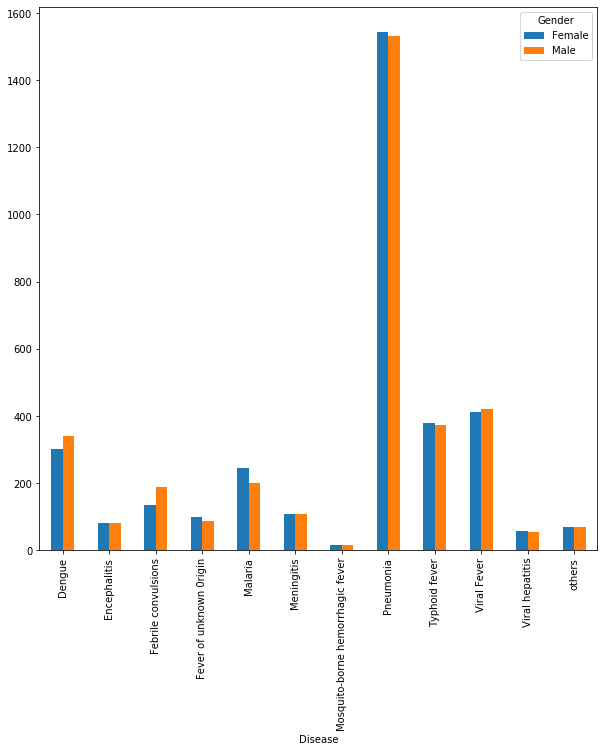

In [112]:
gender_disease[list(gender_disease.columns)].plot(kind='bar' ,figsize = (10,10))


## Most Common Disease By Gender 

In [9]:
gender_disease = gender_disease.T



In [10]:
gender_disease['others'] =  gender_disease[['Acute febrile mucocutaneous lymph node syndrome [MCLS]' , 'Crimean hemorrhagic fever (CHF Congo virus)' , 'Maternal pyrexia' ,'Postprocedural fever','Rheumatic fever','Sinusitis' ,'Mosquito-borne fever/Chikungunya' , 'Fever of unknown origin (PUO)','Tetanus']].sum(axis=1)
gender_disease.drop(labels = ['Acute febrile mucocutaneous lymph node syndrome [MCLS]' , 'Crimean hemorrhagic fever (CHF Congo virus)' , 'Maternal pyrexia' ,'Postprocedural fever','Rheumatic fever','Sinusitis' ,'Mosquito-borne fever/Chikungunya','Fever of unknown origin (PUO)','Tetanus'],axis="columns", inplace=True)
gender_disease = gender_disease.T

In [13]:
gender_disease = gender_disease.T



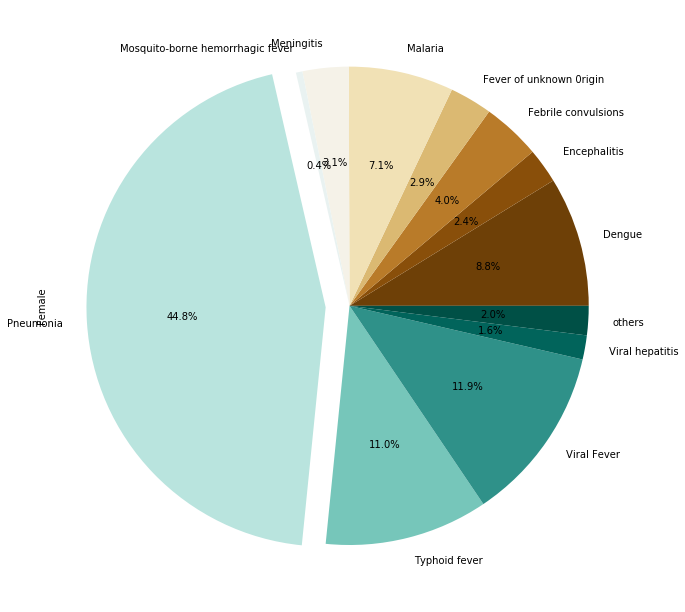

In [14]:

explode = ( 0 ,0, 0, 0,0,0,0,0.1,0,0,0,0)
from matplotlib.colors import ListedColormap
import seaborn as sns
gender_disease['Female'].plot(kind='pie',figsize = (11,11),autopct='%1.1f%%' , explode = explode , shadow=False, colormap=ListedColormap(sns.color_palette("BrBG", 20)) )



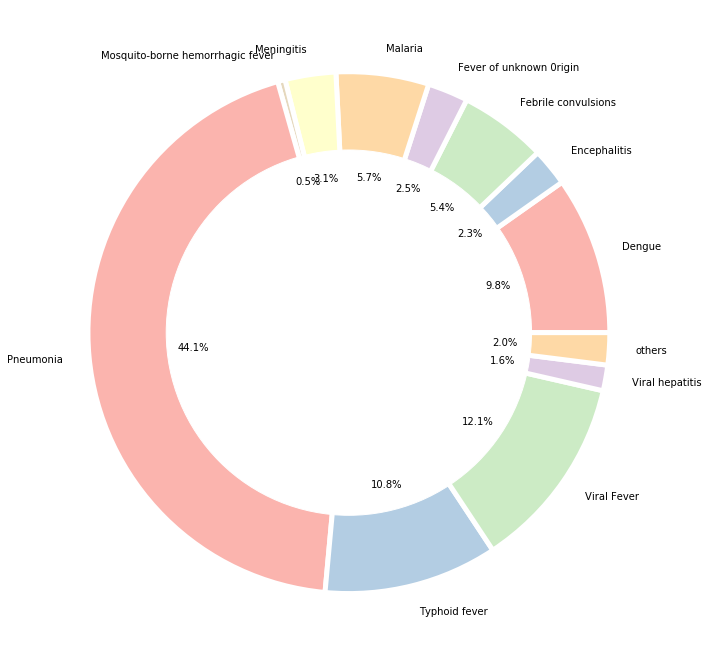

In [110]:
from palettable.colorbrewer.qualitative import Pastel1_7
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(gender_disease['Male'], labels=gender_disease['Male'].index, autopct='%1.1f%%', colors=Pastel1_7.hex_colors , wedgeprops = { 'linewidth' :5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [17]:
pd_crosstabY = pd.crosstab( df["Year"] , df['Gender'])
pd_crosstabY

Gender,Female,Male
Year,,
2014,420,400
2015,558,583
2016,739,734
2017,854,883
2018,870,866


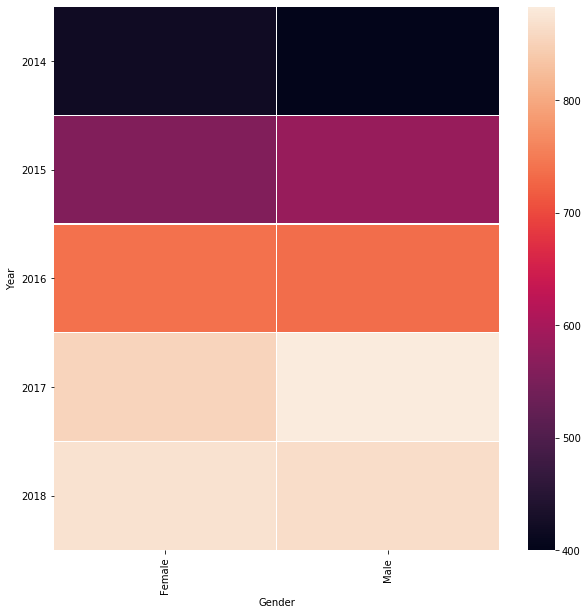

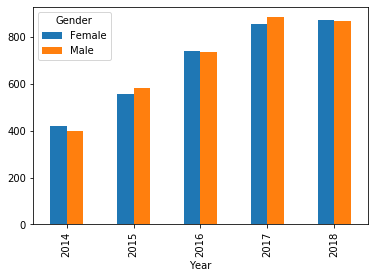

In [18]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(pd_crosstabY, cbar=True, linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

pd_crosstabY[list(pd_crosstabY.columns)].plot(kind='bar')

In [15]:
year_disease = pd.DataFrame(df.loc[df['Gender'] == 'Female'].groupby(['Year'])['Disease'].value_counts().unstack())
year_disease.fillna(0, inplace=True)
year_disease['Summarize'] =  year_disease.sum(axis=1)
#year_disease['Summarize'].plot(kind='bar', stacked = False , figsize=(10,10))

In [77]:
year_disease_m = pd.DataFrame(df.loc[df['Gender'] == 'Male'].groupby(['Year'])['Disease'].value_counts().unstack())
year_disease_m.fillna(0, inplace=True)
year_disease_m['Summarize'] =  year_disease_m.sum(axis=1)

In [78]:
#import chart_studio.plotly.plotly as py
import plotly.graph_objs as go
from  plotly.offline import plot as py
import numpy as np

women_bins = np.array(year_disease['Summarize'])
men_bins = np.array(-year_disease_m['Summarize'])

y = list(year_disease.index)


In [79]:
layout = go.Layout(yaxis=go.layout.YAxis(title='Year'),
                   xaxis=go.layout.XAxis(
                       range=[-1200, 1200],
                       tickvals=[-1000, -700, -300, 0, 300, 700, 1000],
                       ticktext=[1000, 700, 300, 0, 300, 700, 1000],
                       title='Number'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='red')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

py(dict(data=data, layout=layout))

'temp-plot.html'

## MODEL CREATION

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array(year_disease_m['Year']).reshape((-1, 1))
y = np.array(year_disease_m['Summarize'])



In [47]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
y_pred_eq = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred_eq, sep='\n')
x_new = np.array([2019,2020,2021,2022,2023]).reshape((-1, 1))
y_new = model.predict(x_new)
print("new value predictions" ,y_new)

coefficient of determination: 0.9310369241642511
intercept: -488103.4000000002
slope: [243.8]
predicted response:
[2909.8 3153.6 3397.4 3641.2 3885. ]
predicted response:
[[2909.8]
 [3153.6]
 [3397.4]
 [3641.2]
 [3885. ]]
new value predictions [4128.8 4372.6 4616.4 4860.2 5104. ]


In [48]:
x = np.array(year_disease_m['Year']).reshape((-1, 1))
y = np.array(year_disease_m['Pneumonia'])


In [49]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
y_pred_eq = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred_eq, sep='\n')
x_new = np.array([2019,2020,2021,2022,2023]).reshape((-1, 1))
y_new = model.predict(x_new)
print("new data predicted value" , y_new)

coefficient of determination: 0.9972345203790212
intercept: -274569.60000000003
slope: [136.5]
predicted response:
[341.4 477.9 614.4 750.9 887.4]
predicted response:
[[341.4]
 [477.9]
 [614.4]
 [750.9]
 [887.4]]
new data predicted value [1023.9 1160.4 1296.9 1433.4 1569.9]


In [15]:
pd_crosstabD = pd.crosstab( df["Year"] , df['Disease'])
pd_crosstabD

Disease,Acute febrile mucocutaneous lymph node syndrome [MCLS],Crimean hemorrhagic fever (CHF Congo virus),Dengue,Encephalitis,Febrile convulsions,Fever of unknown 0rigin,Fever of unknown origin (PUO),Malaria,Maternal pyrexia,Meningitis,Mosquito-borne fever/Chikungunya,Mosquito-borne hemorrhagic fever,Pneumonia,Postprocedural fever,Rheumatic fever,Sinusitis,Tetanus,Typhoid fever,Viral Fever,Viral hepatitis
Year,,,,,,,,,,,,,,,,,,,,
2014,1,1,30,17,36,34,5,93,0,24,0,0,333,0,2,2,4,108,103,27
2015,0,0,149,11,72,32,8,77,5,34,0,4,484,2,3,2,8,109,123,18
2016,0,2,249,31,53,35,1,113,3,35,0,19,629,3,3,4,5,139,135,14
2017,1,0,109,48,101,38,3,83,2,55,14,4,737,1,3,10,5,159,338,26
2018,2,0,104,55,62,47,15,77,2,68,1,4,889,0,1,6,7,238,132,26


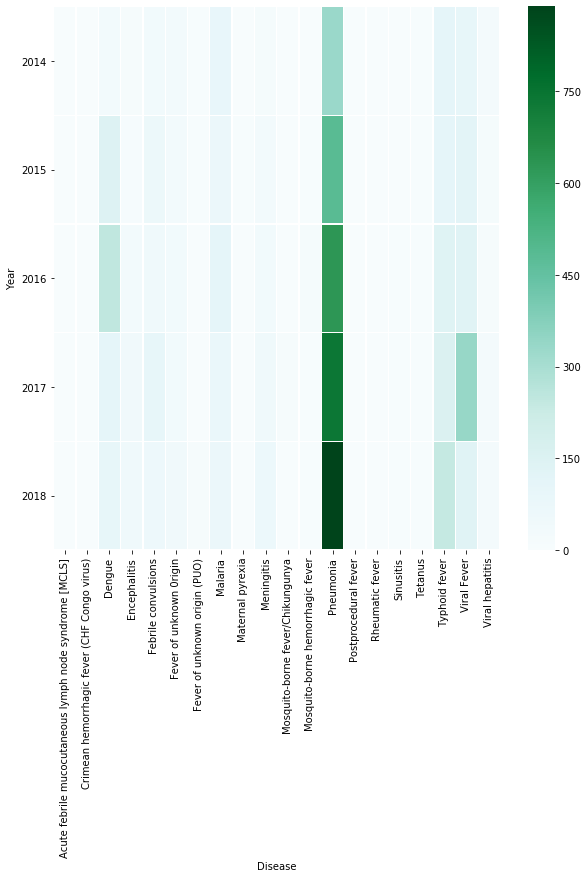

In [21]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(pd_crosstabD, cbar=True, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

In [16]:
from scipy import stats

In [27]:
chi2, p, dof, expected = stats.chi2_contingency(pd_crosstab1)
print(f"Chi2 value= {chi2} p-value= {p} Degrees of freedom= {dof}")

Chi2 value= 1139.0770878204435 p-value= 0.022025103145302476 Degrees of freedom= 1045


In [7]:
gender_map={v:k for k, v in list(enumerate(df.Gender.unique()))}
diagnosis_map={v:k for k, v in list(enumerate(df.Disease.unique()))}
print(gender_map)
print(diagnosis_map)
print(len(diagnosis_map))



{'Female': 0, 'Male': 1}
{'Acute febrile mucocutaneous lymph node syndrome [MCLS]': 0, 'Crimean hemorrhagic fever (CHF Congo virus)': 1, 'Dengue': 2, 'Encephalitis': 3, 'Febrile convulsions': 4, 'Fever of unknown 0rigin': 5, 'Fever of unknown origin (PUO)': 6, 'Malaria': 7, 'Meningitis': 8, 'Pneumonia': 9, 'Rheumatic fever': 10, 'Sinusitis': 11, 'Tetanus': 12, 'Typhoid fever': 13, 'Viral Fever': 14, 'Viral hepatitis': 15, 'Maternal pyrexia': 16, 'Mosquito-borne hemorrhagic fever': 17, 'Postprocedural fever': 18, 'Mosquito-borne fever/Chikungunya': 19}
20


In [10]:
df1 = df.iloc[:]

df1['Gender'] = df1['Gender'].map(gender_map)

df1['Disease'] = df1['Disease'].map(diagnosis_map)
df1.head()

,S.NO,Age,Gender,Disease,Year
0,1.0,51.0,0,0,2014
1,2.0,30.0,0,1,2014
2,3.0,54.0,0,2,2014
3,4.0,71.0,1,2,2014
4,5.0,24.0,0,2,2014


In [12]:
import numpy as np
for c in ['S.NO', 'Age', 'Gender', 'Year']:
    df1[c] = df1[c].astype('float32')
    
df1.dtypes

S.NO       float32
Age        float32
Gender     float32
Disease      int64
Year       float32
dtype: object

In [13]:
d=int(len(df1)*70/100)
print(d)

4834


In [24]:

x_train = df1.iloc[:d,[0,1,2,4]]
x_test = df1.iloc[d:,[0,1,2,4]]

y_train = df1.iloc[:d, 3]
y_test = df1.iloc[d:,3 ]



In [25]:
x_train.shape

(4834, 4)

In [26]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
y_train.shape

(4834, 20)

In [28]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(120, activation='relu', input_shape=(4,)))
network.add(layers.Dense(20, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [30]:

network.fit(x_train, y_train, epochs=20, batch_size=128)

Train on 4834 samples
Epoch 1/20
4834/4834 [==============================] - 0s 38us/sample - loss: 14.8244 - accuracy: 0.0803
Epoch 2/20
4834/4834 [==============================] - 0s 17us/sample - loss: 14.8244 - accuracy: 0.0803
Epoch 3/20
4834/4834 [==============================] - 0s 18us/sample - loss: 14.8244 - accuracy: 0.0803
Epoch 4/20
4834/4834 [==============================] - 0s 15us/sample - loss: 14.8244 - accuracy: 0.0803
Epoch 5/20
4834/4834 [==============================] - 0s 17us/sample - loss: 14.8244 - accuracy: 0.0803
Epoch 6/20
4834/4834 [==============================] - 0s 15us/sample - loss: 14.8244 - accuracy: 0.0803
Epoch 7/20
4834/4834 [==============================] - 0s 15us/sample - loss: 14.8244 - accuracy: 0.0803
Epoch 8/20
4834/4834 [==============================] - 0s 14us/sample - loss: 14.8244 - accuracy: 0.0803
Epoch 9/20
4834/4834 [==============================] - 0s 21us/sample - loss: 14.8244 - accuracy: 0.0803
Epoch 10/20
4834/4834 [=

In [46]:
network.evaluate([[11,33,1.0,2017]], y_test)


ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {"<class \'int\'>", "<class \'float\'>"})'}), <class 'numpy.ndarray'>

In [39]:
 network.predict()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [36]:
predictions.shape

(3, 20)

In [37]:
x_test[:3]

,S.NO,Age,Gender,Year
4834,4835.0,56.0,1.0,2017.0
4835,4836.0,50.0,0.0,2017.0
4836,4837.0,66.0,1.0,2017.0


In [45]:
factor = pd.factorize(df['Disease'])
print(factor)
df.Disease = factor[0]
definitions = factor[1]
#print(df.Disease.head())
#print(definitions)



(array([ 0,  1,  2, ..., 15, 15, 15], dtype=int64), Index(['Acute febrile mucocutaneous lymph node syndrome [MCLS]',
       'Crimean hemorrhagic fever (CHF Congo virus)', 'Dengue', 'Encephalitis',
       'Febrile convulsions', 'Fever of unknown 0rigin',
       'Fever of unknown origin (PUO)', 'Malaria', 'Meningitis', 'Pneumonia',
       'Rheumatic fever', 'Sinusitis', 'Tetanus', 'Typhoid fever',
       'Viral Fever', 'Viral hepatitis', 'Maternal pyrexia',
       'Mosquito-borne hemorrhagic fever', 'Postprocedural fever',
       'Mosquito-borne fever/Chikungunya'],
      dtype='object'))


,S.NO,Age,Gender,Disease,Year
0,1.0,51.0,Female,0,2014
1,2.0,30.0,Female,1,2014
2,3.0,54.0,Female,2,2014
3,4.0,71.0,Male,2,2014
4,5.0,24.0,Female,2,2014
5,6.0,61.0,Female,2,2014
6,7.0,27.0,Female,2,2014
7,8.0,32.0,Male,2,2014
8,9.0,22.0,Female,2,2014
9,10.0,45.0,Male,2,2014
